In [1]:
import os,sys
import numpy as np
from tmd import TMD
import pylab as py
import pandas as pd

## Load the TMD class

In [2]:
tag='JAM3D_2020' 
tmd=TMD(tag)

JAM3D_2020 is a tag for a given analysis. See the table in the readme file.

In [3]:
M = 0.93891897
Mpi = 0.135

## Simple test

In [6]:
x=0.1
Q2=10.0
kT=0.1
print tmd.eval(x,Q2,kT,'p','transversity',0,icol=False, False)
print tmd.eval(x,Q2,kT,'p','transversity',0,icol=True, False)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-6-fdeff9354b2a>, line 4)

- icol=False will give the full TMD while icol=True will return only the collinear part: see Eqs. (3)-(7) of arXiv:2002.08384 


- The 5th argument in tmd.eval is the hadron (p: proton, pi: pion)


- The 6th argument in tmd.eval is the replica index (0 is chosen in this case). You can get the number of replicas via tmd.nrep:


In [5]:
x=0.1
z=0.1
Q2=10.0
pT=0.1
print(tmd.eval_stfunc('FUU',x,z,Q2,pT,'p','pi+',0,icol=False))
print(tmd.eval_asymmetry('Siv',x,z,Q2,pT,'p','pi+',0,icol=False))

5.534289271502863
0.0026224953566848204


- tmd.eval_stfunc gives the structure function: 'FUU' for unpolarized; 'FUTSiv' for Sivers; 'FUTCol' for Collins


- tmd.eval_asymmetry gives the asymmetry: Sivers ('Siv') = FUTSiv/FUU; Collins ('Col') = FUTCol/FUU (NO depolarization factor)


- The 8th argument in tmd.eval_stfunc and tmd.eval_asymmetry is the replica index (0 is chosen in this case). You can get the number of replicas via tmd.nrep:

In [7]:
tmd.nrep

953

## Sivers asymmetry example

In [7]:
data=pd.DataFrame(pd.read_excel('../jam3d/database/sidis/expdata/2001.xlsx'))
data.reset_index()
data[(data.Q2>1.63) & (data.z>0.2) & (data.z<0.6) & (data.pT>0.2) & (data.pT<0.9)]

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat_u,systrel,systabs_u,target,hadron,col,Dependence
1,8,27.6,0.056,0.569,0.356,1.631,0.409,AUTsivers,0.0264,0.0071,0,0.0017,proton,pi+,hermes,x
2,9,27.6,0.076,0.513,0.367,2.017,0.372,AUTsivers,0.0542,0.0078,0,0.0024,proton,pi+,hermes,x
3,10,27.6,0.098,0.484,0.376,2.467,0.356,AUTsivers,0.0516,0.0070,0,0.0033,proton,pi+,hermes,x
4,11,27.6,0.133,0.464,0.379,3.203,0.344,AUTsivers,0.0361,0.0066,0,0.0046,proton,pi+,hermes,x
5,12,27.6,0.186,0.449,0.379,4.321,0.339,AUTsivers,0.0531,0.0086,0,0.0064,proton,pi+,hermes,x
6,13,27.6,0.275,0.434,0.375,6.179,0.344,AUTsivers,0.0546,0.0118,0,0.0093,proton,pi+,hermes,x


- load an experimental data set (with cuts on Q^2, z, and pT); in this case, we are using HERMES proton Sivers data for pi+ production

In [8]:
tar=np.array(data['target'])[0]
if tar=='proton': tar='p'
elif tar=='neutron': tar='n'
elif tar=='deuteron': tar='d'

had=np.array(data['hadron'])[0]

obs=np.array(data['obs'])[0]
if obs=='AUTsivers': obs='Siv'
elif obs=='AUTcollins': obs='Col'

xarr=np.array(data['x'])
zarr=np.array(data['z'])
Q2arr=np.array(data['Q2'])
pTarr=np.array(data['pT'])
asym=map(lambda x,z,Q2,pT: tmd.eval_asymmetry(obs,x,z,Q2,pT,tar,had,0,icol=False),xarr,zarr,Q2arr,pTarr)

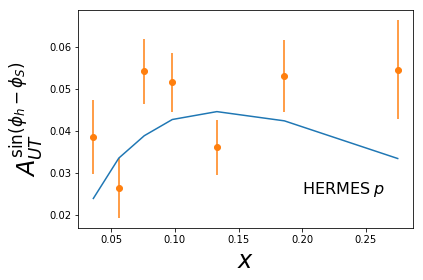

In [9]:
ax=py.subplot(111)
ax.plot(xarr,asym,linestyle='-')
ax.errorbar(xarr,data['value'],data['stat_u'],marker='o',linestyle='')
ax.set_xlabel('$x$',size=24)
ax.set_ylabel('$A_{UT}^{\sin(\phi_h-\phi_S)}$',size=24)
ax.text(0.2,0.025,r'${\rm HERMES}\;p$',fontsize=16)

py.show()

## Transversity (collinear)

Generate the data

In [11]:
X=np.linspace(0.01,0.99,100)
Q2=2.4
kT=0.0
nrep=50  #--let's use a subset of the replicas
tran=np.array([[tmd.eval(x,Q2,kT,'p','transversity',irep,icol=True,deriv=False) for x in X] for irep in range(nrep)])
print(tran.shape)

TypeError: get_tmd() got an unexpected keyword argument 'deriv'

- This is 50 replicas, 100 x-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [10]:
u_rep=tran[:,:,1]
d_rep=tran[:,:,3]

u  = np.mean(u_rep,axis=0)
du = np.std(u_rep,axis=0)
d  = np.mean(d_rep,axis=0)
dd = np.std(d_rep,axis=0)


NameError: name 'tran' is not defined

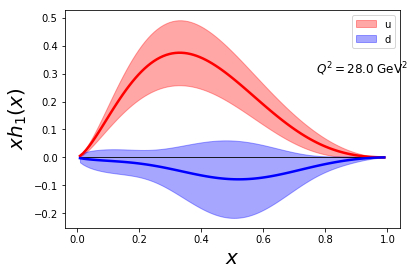

In [12]:
ax=py.subplot(111)
ax.fill_between(X,X*(u-du),X*(u+du),color="r",alpha=0.35,label='u')
ax.fill_between(X,X*(d-dd),X*(d+dd),color="b",alpha=0.35,label='d')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(X,X*u,color="r",linewidth=2.5)
ax.plot(X,X*d,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$xh_1(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.text(0.77,0.3,r'$Q^2=%1.1f\; {\rm GeV}^2$'%Q2,fontsize=12)


py.show()

In [30]:
file=open('transversity_jam20_xh1u28.dat', 'w')
for i in range(1,len(X)):
    file.write('%f %f %f %f \n'%(X[i],X[i]*(u[i]-du[i]),X[i]*u[i],X[i]*(u[i]+du[i]))) 
file.close()

file=open('transversity_jam20_xh1d28.dat', 'w')
for i in range(1,len(X)):
    file.write('%f %f %f %f \n'%(X[i],X[i]*(d[i]-dd[i]),X[i]*d[i],X[i]*(d[i]+dd[i]))) 
file.close()

## Transversity (TMD)

Generate the data

In [13]:
KT=np.linspace(0.01,0.99,100)
Q2=4.0
x=0.1
nrep=50  #--let's use a subset of the replicas
trankT=np.array([[tmd.eval(x,Q2,kT,'p','transversity',irep,icol=False) for kT in KT] for irep in range(nrep)])
print(trankT.shape)

(50, 100, 11)


- This is 50 replicas, 100 kT-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [14]:
u_repkT=trankT[:,:,1]
d_repkT=trankT[:,:,3]

ukT  = np.mean(u_repkT,axis=0)
dukT = np.std(u_repkT,axis=0)
dkT  = np.mean(d_repkT,axis=0)
ddkT = np.std(d_repkT,axis=0)


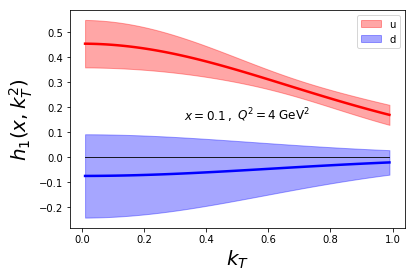

In [15]:
ax=py.subplot(111)
ax.fill_between(KT,(ukT-dukT),(ukT+dukT),color="r",alpha=0.35,label='u')
ax.fill_between(KT,(dkT-ddkT),(dkT+ddkT),color="b",alpha=0.35,label='d')


ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(KT,ukT,color="r",linewidth=2.5)
ax.plot(KT,dkT,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$h_1(x,k_T^2)$',size=20)
ax.set_xlabel(r'$k_T$',size=20)
ax.text(0.33,0.15,r'$x=0.1\,,$',fontsize=12)
ax.text(0.5,0.15,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()

## Sivers first moment (collinear)

Generate the data

In [33]:
X=np.linspace(0.01,0.99,100)
Q2=28.0
kT=0.0
nrep=50  #--let's use a subset of the replicas
siv=np.array([[tmd.eval(x,Q2,kT,'p','sivers',irep,icol=True) for x in X] for irep in range(nrep)])
print(siv.shape)

(50, 100, 11)


- This is 50 replicas, 100 x-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [34]:
u_rep=siv[:,:,1]
d_rep=siv[:,:,3]

u  = np.mean(u_rep,axis=0)
du = np.std(u_rep,axis=0)
d  = np.mean(d_rep,axis=0)
dd = np.std(d_rep,axis=0)


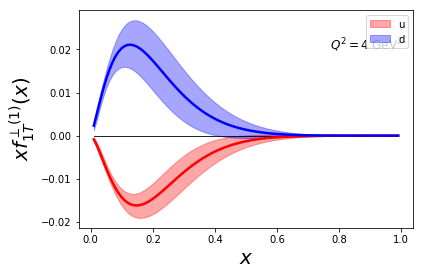

In [35]:
ax=py.subplot(111)
ax.fill_between(X,X*(u-du),X*(u+du),color="r",alpha=0.35,label='u')
ax.fill_between(X,X*(d-dd),X*(d+dd),color="b",alpha=0.35,label='d')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(X,X*u,color="r",linewidth=2.5)
ax.plot(X,X*d,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$xf_{1T}^{\perp(1)}(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.text(0.77,0.02,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()

In [36]:
file=open('sivers_jam20_xf1Tpu28.dat', 'w')
for i in range(1,len(X)):
    file.write('%f %f %f %f \n'%(X[i],X[i]*(u[i]-du[i]),X[i]*u[i],X[i]*(u[i]+du[i]))) 
file.close()

file=open('sivers_jam20_xf1Tpd28.dat', 'w')
for i in range(1,len(X)):
    file.write('%f %f %f %f \n'%(X[i],X[i]*(d[i]-dd[i]),X[i]*d[i],X[i]*(d[i]+dd[i]))) 
file.close()

## Sivers (TMD)

Generate the data

In [19]:
KT=np.linspace(0.01,0.99,100)
Q2=4.0
x=0.1
nrep=50  #--let's use a subset of the replicas
sivkT=np.array([[tmd.eval(x,Q2,kT,'p','sivers',irep,icol=False) for kT in KT] for irep in range(nrep)])
print(sivkT.shape)

(50, 100, 11)


- This is 50 replicas, 100 kT-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [20]:
u_repkT=sivkT[:,:,1]
d_repkT=sivkT[:,:,3]

ukT  = np.mean(u_repkT,axis=0)
dukT = np.std(u_repkT,axis=0)
dkT  = np.mean(d_repkT,axis=0)
ddkT = np.std(d_repkT,axis=0)


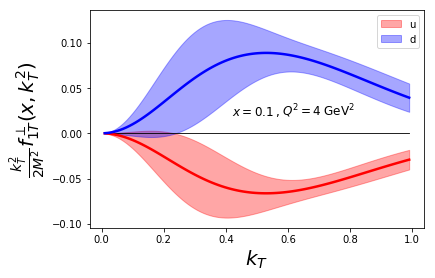

In [21]:
ax=py.subplot(111)
ax.fill_between(KT,KT**2/(2.*M**2)*(ukT-dukT),KT**2/(2.*M**2)*(ukT+dukT),color="r",alpha=0.35,label='u')
ax.fill_between(KT,KT**2/(2.*M**2)*(dkT-ddkT),KT**2/(2.*M**2)*(dkT+ddkT),color="b",alpha=0.35,label='d')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(KT,KT**2/(2.*M**2)*ukT,color="r",linewidth=2.5)
ax.plot(KT,KT**2/(2.*M**2)*dkT,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$\frac{k_T^2}{2 M^2}f_{1T}^\perp(x,k_T^2)$',size=20)
ax.set_xlabel(r'$k_T$',size=20)
ax.text(0.42,0.02,r'$x=0.1\,,$',fontsize=12)
ax.text(0.58,0.02,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()

## Collins first moment (collinear)

Generate the data

In [22]:
X=np.linspace(0.01,0.99,100)
Q2=4.0
kT=0.0
nrep=50  #--let's use a subset of the replicas
col=np.array([[tmd.eval(x,Q2,kT,'pi','collinspi',irep,icol=True) for x in X] for irep in range(nrep)])
print(col.shape)

(50, 100, 11)


- This is 50 replicas, 100 z-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot favored and unfavored

In [23]:
fav_rep=col[:,:,1]
unf_rep=col[:,:,3]

fav  = np.mean(fav_rep,axis=0)
dfav = np.std(fav_rep,axis=0)
unf  = np.mean(unf_rep,axis=0)
dunf = np.std(unf_rep,axis=0)


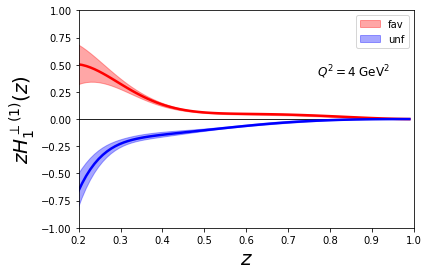

In [24]:
ax=py.subplot(111)
ax.fill_between(X,X*(fav-dfav),X*(fav+dfav),color="r",alpha=0.35,label='fav')
ax.fill_between(X,X*(unf-dunf),X*(unf+dunf),color="b",alpha=0.35,label='unf')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(X,X*fav,color="r",linewidth=2.5)
ax.plot(X,X*unf,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$zH_{1}^{\perp(1)}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.text(0.77,0.4,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)

ax.set_xlim(0.2,1)
ax.set_ylim(-1,1)

py.show()

## Collins (TMD)

Generate the data

In [25]:
KT=np.linspace(0.01,0.99,100)
Q2=4.0
z=0.3
nrep=50  #--let's use a subset of the replicas
colkT=np.array([[tmd.eval(z,Q2,kT,'pi','collinspi',irep,icol=False) for kT in KT] for irep in range(nrep)])
print(colkT.shape)

(50, 100, 11)


- This is 50 replicas, 100 kT-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [26]:
fav_repkT=colkT[:,:,1]
unf_repkT=colkT[:,:,3]

favkT  = np.mean(fav_repkT,axis=0)
dfavkT = np.std(fav_repkT,axis=0)
unfkT  = np.mean(unf_repkT,axis=0)
dunfkT = np.std(unf_repkT,axis=0)


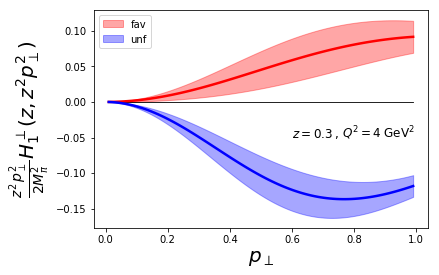

In [27]:
ax=py.subplot(111)
ax.fill_between(KT,z**2*KT**2/(2.*Mpi**2)*(favkT-dfavkT),z**2*KT**2/(2.*Mpi**2)*(favkT+dfavkT),color="r",alpha=0.35,label='fav')
ax.fill_between(KT,z**2*KT**2/(2.*Mpi**2)*(unfkT-dunfkT),z**2*KT**2/(2.*Mpi**2)*(unfkT+dunfkT),color="b",alpha=0.35,label='unf')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(KT,z**2*KT**2/(2.*Mpi**2)*favkT,color="r",linewidth=2.5)
ax.plot(KT,z**2*KT**2/(2.*Mpi**2)*unfkT,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$\frac{z^2\,p_\perp^2}{2 M_\pi^2}H_{1}^\perp(z,z^2 p_\perp^2)$',size=20)
ax.set_xlabel(r'$p_\perp$',size=20)
ax.text(0.6,-0.05,r'$z=0.3\,,$',fontsize=12)
ax.text(0.76,-0.05,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()